In [ ]:
from sklearn import linear_model
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


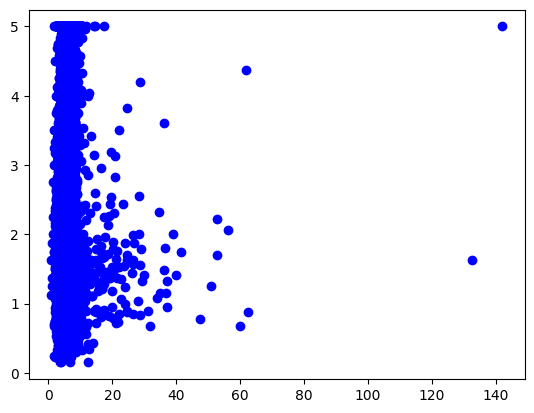

In [ ]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

plt.plot(X['AveRooms'], y, 'ob')
plt.show()

In [ ]:
X2 = pd.DataFrame(X['MedInc'])
reg = linear_model.LinearRegression()
reg.fit(X2, y=y)
print(reg.coef_)
print(reg.intercept_)

[0.41793849]
0.45085576703267893


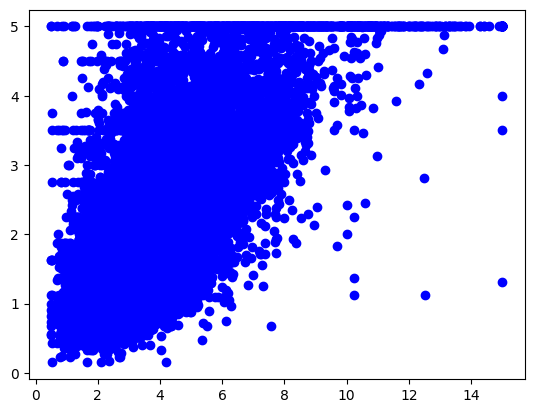

In [ ]:
plt.plot(X['MedInc'], y, 'ob')
plt.show()

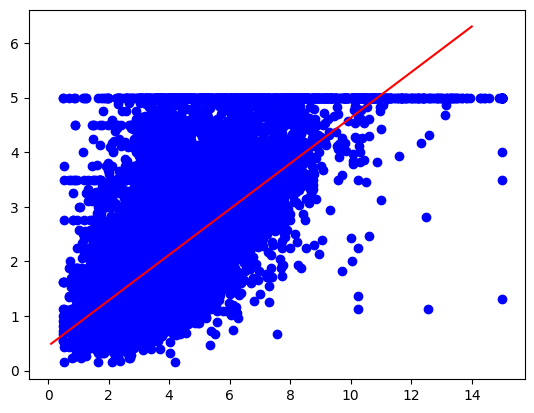

In [ ]:
x= np.linspace(0.1,14,100)
#y_pred = reg.predict(pd.DataFrame(x))

y_pred = reg.predict(pd.DataFrame(x, columns=['MedInc']))
plt.plot(X['MedInc'], y,'ob')
plt.plot(x, y_pred, '-r' )
plt.show()

Se carga un segundo conjunto de datos

In [ ]:
df = pd.read_csv('car data.csv')
df#se recomienda realizar un EDA

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
vars = ['Kms_Driven', 'Year']
X = df.loc[:,vars]
Y = df.loc[:,'Selling_Price']

In [ ]:
X

,Kms_Driven,Year
0,27000,2014
1,43000,2013
2,6900,2017
3,5200,2011
4,42450,2014
...,...,...
296,33988,2016
297,60000,2015
298,87934,2009
299,9000,2017


In [ ]:
Y# definimos las variables objetivo o un tarjet

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


Normalizamos los datos

Procesarlos

Scaller a X


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)



Scaller a y

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_Y = MinMaxScaler()
Y = scaler_Y.fit_transform(pd.DataFrame(Y))

# El conjunto de datos debe dividirse en un modelo de entrenamiento y otro de prueba

Lo mejor es usar seleccion aleatoria  simple

In [ ]:
from sklearn.model_selection import train_test_split as split #split separa una pargte de los datos para entrenamiento y otra para pruueba

La distribucion recomendada es 80 para entrenamiento y 20 de prueba

generalmente entre 40-60 a 80-20



Para millones de datos es mejor 50-50

# Train-Test-Split

#Los resultados llegan en el orden en que estan en los paramentros, primero llega el conjunto x en este caso y luego las Ys, y como lo dice el nombre de la funcion primero llega el train y luego el test

In [ ]:
X_train, X_test, Y_train, Y_tests = split(X,Y,test_size=0.8)#separar conjunto de datos de prueba y conjunto de datos de entrenamiento en un 80%

# test_size = train_size





Crear modelos de regresion para predecir el precio

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train, Y_train)

Probar el desempeño del modelo

In [ ]:
#EDA a los precios

np.mean(Y_tests)

0.12883044620670797

Predicciones de Y en base al Conjunto de prueba de X

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse
Y_pred = reg.predict(X_test)
print("mae", mae(Y_tests, Y_pred))

print("rmse", rmse(Y_tests, Y_pred))

mae 0.09952510883732452
rmse 0.1874875143872488


Probamos con los  datos  de  entrenaiento

In [ ]:
Y_pred2 = reg.predict(X_train)
print("mae", mae(Y_train, Y_pred2))

print("rmse", rmse(Y_train, Y_pred2))

mae 0.09948357170633033
rmse 0.15916865675058856


# Actividad. Experimentar con variables numericas:

En este caso de variabbles se usa el kilometraje y el present price

In [ ]:
vars = ['Kms_Driven', 'Present_Price']
X = df.loc[:,vars]
Y = df.loc[:,'Selling_Price']

In [ ]:
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

scaler_Y = MinMaxScaler()
Y = scaler_Y.fit_transform(pd.DataFrame(Y))

In [ ]:
X_train, X_test, Y_train, Y_tests = split(X,Y,test_size=0.8)#separar conjunto de datos de prueba y conjunto de datos de entrenamiento en un 80%

# test_size = train_size


In [ ]:
reg = LinearRegression()
reg = reg.fit(X_train, Y_train)

In [ ]:
#EDA a los precios

np.mean(Y_tests)

0.12350640240640122

In [ ]:
Y_pred = reg.predict(X_test)
print("mae", mae(Y_tests, Y_pred))

print("rmse", rmse(Y_tests, Y_pred))

mae 0.05231872685408309
rmse 0.07624289296424912


In [ ]:
Y_pred2 = reg.predict(X_train)
print("mae", mae(Y_train, Y_pred2))

print("rmse", rmse(Y_train, Y_pred2))

mae 0.05228962258533418
rmse 0.07552933446029828


# 2: En este caso de variabbles se usa el año y el present price

In [ ]:
vars = ['Year', 'Present_Price']
X = df.loc[:,vars]
Y = df.loc[:,'Selling_Price']

In [ ]:
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

scaler_Y = MinMaxScaler()
Y = scaler_Y.fit_transform(pd.DataFrame(Y))

In [ ]:
X_train, X_test, Y_train, Y_tests = split(X,Y,test_size=0.8)#separar conjunto de datos de prueba y conjunto de datos de entrenamiento en un 80%

# test_size = train_size

In [ ]:
reg = LinearRegression()
reg = reg.fit(X_train, Y_train)

In [ ]:
#EDA a los precios

np.mean(Y_tests)

0.12523035584776898

In [ ]:
Y_pred = reg.predict(X_test)
print("mae", mae(Y_tests, Y_pred))

print("rmse", rmse(Y_tests, Y_pred))

mae 0.03921344677471327
rmse 0.059008850300322414


In [ ]:
Y_pred2 = reg.predict(X_train)
print("mae", mae(Y_train, Y_pred2))

print("rmse", rmse(Y_train, Y_pred2))

mae 0.04308494865674443
rmse 0.05745187330878639
